In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [4]:
data_path = 'C:\\Users\\mooha\\jupyter\\NLP Project\\TextClassification\\dataset.csv'
data = pd.read_csv(data_path, encoding = 'ISO-8859-1')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        7570 non-null   object
 1   CancerType  7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB
None


,Text,CancerType
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer


In [5]:
print('Max Letters Count document: ', data['Text'].apply(len).max())
data['Letters Count'] = data['Text'].apply(len)
print('index: ', data['Letters Count'].idxmax())

data.head()

Max Letters Count document:  32712
index:  10


,Text,CancerType,Letters Count
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer,20707
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer,17018
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer,21622
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer,13860
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer,23696


['Thyroid_Cancer' 'Colon_Cancer' 'Lung_Cancer']


<Axes: xlabel='CancerType', ylabel='count'>

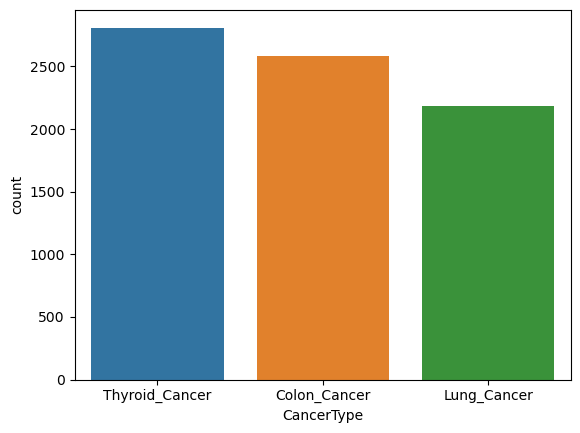

In [6]:
print(data['CancerType'].unique())
sb.countplot(x = data['CancerType'])

In [7]:
# nltk.download()
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
lemmtizer = WordNetLemmatizer()

corpus = []
for i in range(len(data)):
    documents = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    documents = documents.lower()
    tokens = word_tokenize(documents)
    
    words = []
    for word in tokens:
        if word not in stopwords:
            if len(word) <= 2:
                continue
                
            word = lemmtizer.lemmatize(word, 'n')
            word = lemmtizer.lemmatize(word, 'v')
            word = lemmtizer.lemmatize(word, 'a')
            word = lemmtizer.lemmatize(word, 'r')
            words.append(word)
            
    documents = ' '.join(words)
    corpus.append(documents)

print(corpus[0], '\n')
print(len(corpus))

thyroid surgery child single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim university buraidah qassim saudi arabia bdepartment surgery king faisal specialist hospital research center riyadh saudi arabia cdepartment medicine king faisal specialist hospital research center riyadh saudi arabia correspondence osama ibrahim almosallam department surgery college medicine qassim university box buraidah qassim saudi arabia osama iaahotmailcom orcid orcid citation almosallam aseeri alhumaid alzahrani alsobhi alshanafey thyroid surgery child single institution ann saudi med receive january accept may publish august copyright copyright annals saudi medicine saudi arabia access creative common attributionnoncommercialnoderivatives international license byncnd detail access httpcreativecommons licensesbyncnd fund nonebackground data thyroid surgery child scarceobjective analyze outcome 

In [12]:
max_words = 25000
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)

le = LabelEncoder()
data['CancerType'] = le.fit_transform(data['CancerType'])
y = data['CancerType']

print(X[0], '\n')
print(y[0])

data.head()

[152, 116, 748, 377, 2508, 24466, 9738, 3070, 7163, 3070, 15063, 116, 1166, 175, 15264, 103, 15264, 2840, 5230, 12687, 116, 6340, 11744, 2808, 137, 72, 293, 13856, 2840, 5230, 24016, 175, 6340, 11744, 2808, 137, 72, 293, 13856, 2840, 5230, 1107, 24466, 9738, 184, 116, 1166, 175, 15264, 103, 1509, 15264, 2840, 5230, 24466, 4699, 4699, 5417, 152, 116, 748, 377, 2508, 1266, 2840, 304, 214, 1522, 735, 36, 239, 392, 892, 892, 8365, 2840, 175, 2840, 5230, 278, 141, 76, 9739, 407, 369, 4454, 528, 278, 1152, 10, 152, 116, 748, 133, 166, 10, 152, 116, 1763, 120, 465, 5793, 95, 174, 80, 371, 1287, 30, 10, 3, 49, 812, 152, 116, 393, 2835, 10, 166, 132, 1330, 3309, 152, 611, 529, 959, 2330, 3963, 1426, 16, 179, 17, 3, 500, 3309, 511, 354, 104, 71, 1832, 49, 41, 205, 2095, 2965, 66, 507, 483, 201, 3, 4264, 2529, 4667, 7004, 329, 661, 3114, 33, 3, 427, 2, 1320, 3, 687, 1929, 299, 217, 85, 1043, 85, 18, 511, 22, 105, 3309, 17279, 3723, 10329, 3309, 24467, 3, 203, 7778, 4790, 7485, 1444, 4197, 1845, 4

,Text,CancerType,Letters Count
0,Thyroid surgery in children in a single insti...,2,20707
1,""" The adopted strategy was the same as that us...",2,17018
2,coronary arterybypass grafting thrombosis ï¬b...,2,21622
3,Solitary plasmacytoma SP of the skull is an u...,2,13860
4,This study aimed to investigate serum matrix ...,2,23696


In [146]:
# print(len(X[10]), '\n')

# for i in range(len(X)):
#     if (len(X[i])) > 2500:
#         print('y')

2851 

y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

max_Text_length = 1000

X_train = sequence.pad_sequences(X_train, maxlen = max_Text_length, padding = 'post')
X_test = sequence.pad_sequences(X_test, maxlen = max_Text_length, padding = 'post')

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')
print((X_train[0]))

(6056, 1000) (6056,) (1514, 1000) (1514,) 

[  799 17672  9865    38  7851 15497   346  2743    17   346    11  1047
   138   378   826    72 10241    12   709 10241   133 12870    17   183
    99    44    62     2 15303    49  3664     4   152   389    87     3
   259   231  2772   247    67  2715   558   349   152  9867     2  1014
  1020     5  1383   210   210   263  6618  2662    97  1126    62     2
   817     9    43   180   463  7239    15    23    44    62     2  8522
   210 17671  2304    26 15557  2158    99    44    62     2    69  1020
   178     5   210  1889  2662   210    96   152    78    50  1889  2662
    41  2772    44  1416   318   241   349    59 20508 20509 15557    37
   111   108  2772   144   165    62     2    43     6  1024    14   173
  1463    39   315     1   396   157  5965   435    55  1068   194  8504
  2662    62   105     5    22  1068    17     9     3 17671   124    44
    62    70   826   109     5   943    11    26 10241    72    36 10241
    72 

In [15]:
model = Sequential()

model.add(Embedding(max_words, 100, input_length = max_Text_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 64)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/5
95/95 [==============================] - 128s 1s/step - loss: 0.6404 - accuracy: 0.7297 - val_loss: 0.0879 - val_accuracy: 0.9795
Epoch 2/5
95/95 [==============================] - 125s 1s/step - loss: 0.0405 - accuracy: 0.9901 - val_loss: 0.0174 - val_accuracy: 0.9947
Epoch 3/5
95/95 [==============================] - 125s 1s/step - loss: 0.0161 - accuracy: 0.9932 - val_loss: 0.0091 - val_accuracy: 0.9974
Epoch 4/5
95/95 [==============================] - 125s 1s/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0110 - val_accuracy: 0.9954
Epoch 5/5
48/48 [==============================] - 13s 257ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         2500000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                     

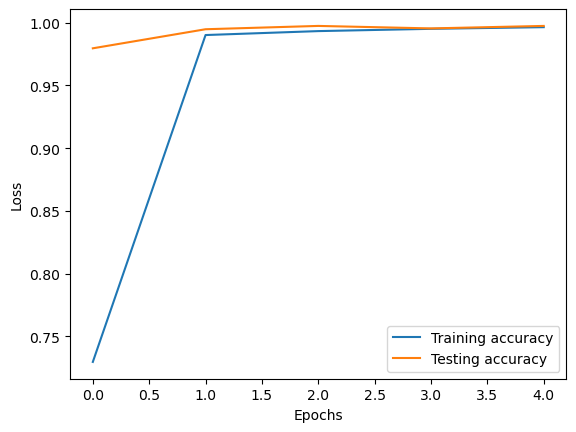

In [16]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

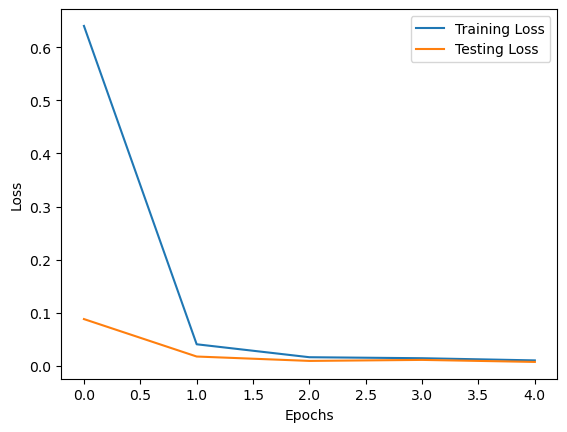

In [17]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
print(list(y_test[:25]), '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(len(y_pred)):
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol)

[0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1] 

[[9.99728799e-01 5.50261830e-05 2.16130735e-04]
 [1.54306399e-04 2.01990088e-06 9.99843597e-01]
 [9.99981105e-01 3.31477600e-06 1.54948557e-05]
 [5.25847136e-05 2.29110901e-06 9.99945104e-01]
 [9.99894559e-01 1.86616398e-05 8.67077906e-05]
 [5.69321623e-04 1.18619355e-05 9.99418855e-01]
 [9.99985516e-01 1.08575864e-06 1.33212043e-05]
 [3.66843924e-05 9.99915540e-01 4.77301219e-05]
 [9.99658823e-01 7.07017025e-05 2.70572258e-04]
 [9.99987662e-01 1.34141862e-06 1.09786988e-05]
 [5.08552194e-01 4.68323752e-03 4.86764550e-01]
 [9.97547686e-01 3.95182025e-04 2.05703499e-03]
 [2.18663990e-04 9.99542773e-01 2.38519788e-04]
 [1.43074994e-05 9.99958217e-01 2.74576541e-05]
 [1.86057496e-05 9.99946892e-01 3.44886575e-05]
 [3.35705205e-04 9.99253511e-01 4.10873385e-04]
 [1.02364815e-04 4.02134310e-06 9.99893486e-01]
 [1.00570137e-03 8.58495187e-04 9.98135805e-01]
 [1.17311967e-04 9.99634504e-01 2.48255907e-04]
 [4.538139

<Figure size 500x500 with 0 Axes>

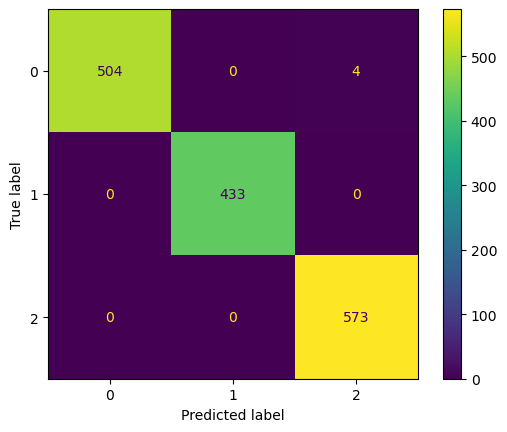

In [19]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [20]:
test_text = '''This study was performed to explore the effective management of bleeding associated with
radiofrequency ablation RFA of benign thyroid nodulesMethods Thirtyfive patients with benign thyroid
nodules who were treated with ultrasoundguided RFA from July  to December  at the Third Affiliated Hospital of Sun YatsenUniversity were retrospectively reviewed The technique efficacy bleeding and other complications were assessed during the followup periodResults The mean technique efficacy was 06 at  month and 06 at months after the procedure One case of an intranodular haematoma and two cases of voicechange  month were observed All patients recovered with corresponding treatmentConclusion Although the incidence of haemorrhage is low serious haematomas are lifethreatening Therefore having a comprehensive understanding of the potential complicationsan accurate clinical strategy and adequate technical skills may prevent or help to properly managethese complicationsKeywordsRadiofrequency ablation benign thyroid nodules haemorrhage management haematomaultrasoundDate received  January  accepted  June 1Department of Medical Ultrasound The Third AffiliatedHospital of Sun Yatsen University Guangzhou China2General Surgery Department The Third AffiliatedHospital of Sun Yatsen University Guangzhou ChinaThese authors contributed equally to this workCorresponding authorsBo Liu General Surgery Department The Third AffiliatedHospital of Sun Yatsen University  Tianhe RoadGuangzhou City Guangdong Province China Jie RenDepartment of Medical Ultrasound The Third AffiliatedHospital of Sun Yatsen University  Tianhe RoadGuangzhou City Guangdong Province ChinaEmails renjieguangzhou126com liubojake126comCreative Commons Non Commercial CC BYNC This  is distributed under the terms of the CreativeCommons AttributionNonCommercial  License creativecommonslicensesbync40 which permitsnoncommercial use reproduction and distribution of the work without further permission provided the original work is attributedas specified on the SAGE and   Access pages ussagepubcomenusnam accessatsage 0cIntroductionAssociationfor AdultThyroid nodules are extremely commonand the associated morbidity rate rangesfrom  to  according to highresolution ultrasound US ï¬ndings12Mostthyroid nodules are benign andrequire no intervention other than clinicalfollowup According to the  AmericanThyroidManagementGuidelinesPatients withThyroid Nodulesand DifferentiatedThyroid Cancer thyroidstimulating hormone suppression therapy for benign thyroid nodules BTNs is not recommendedbecause the potential harm outweighs thebeneï¬t3 Radioiodine therapy was historically an effective treatment for thyroid hotnodules and a possible alternative to surgery Howeverthis technique has beenproven to have uncertain efï¬cacy andsome adverse effects such as hypothyroidrecurrence4“ Surgery may beism orconsideredgrowing BTNs withpressurerelated symptoms neck discomfort cosmetic concerns or decreased quality of life3 At present partialtotal thyroidsurgery is considered the gold standardtreatment Surgeryassociated withnumerous complications such as nerveinjury anaesthesiarelated problemslonghospital stays conspicuous scars haemorrhage and lesions ofthe parathyroidglands78 In addition hypothyroidism isinevitable after totalthyroidectomy andrequires lifelong hormone supplementationHenceincreasingly minimally invasivetherapeutic strategies are currently used totreat BTNs In most cases several thermalablation techniques such as laser ablationmicrowave ablation radiofrequency ablation RFA and highintensity focused UShave been shown to be effective in BTNsAmong these thermal ablation techniquesRFA is the most widely applied910forisRFA of thyroid diseases ï¬rst reported in“ is considered efï¬cacious and safeJournal of International Medical Researchfor treatment of BTNs1415 To date no lifethreatening complications related to RFAhave been reported Howeverseveralcases of haemorrhagerelated to ï¬neneedle aspiration FNA or core needlebiopsy CNB have been reported16“Although a microinvasive procedure suchas FNA can result in massive uncontrolledbleeding resulting in upper airway respiratoryuncontrolledbleeding is a rare but lifethreatening complication of RFA Thus management ofbleeding associated with RFA of BTNs isof vitalimportance This study was performed to explore the effective managementof bleeding associated with RFA of BTNsobstructionsuchMaterials and methodsofThis study was approved by the EthicsCommitteethe Third Afï¬liatedHospital of Sun Yatsen University andwritten informed consent was obtainedfrom all patients prior to the performanceof USguided FNA or CNB and RFA Therequirement to obtain informed consent forpublication was waived because of the retrospective nature of the studyPatientsAll consecutive patients who underwentRFA of BTNs at our institution from July to December  were analysed Thefollowing inclusion criteria were appliedconï¬rmation of benignancyBethesdaClass II by FNA cytology or CNB complaints of pressure symptoms compressivesymptoms neck discomfort orforeignbody sensation or cosmetic problems a2cm maximum diameter of the indexnodule anxiety about a malignancy unsuitability for surgery or unwillingness toundergo surgery and a normal serum thyrotropin concentration normal completeblood counts and normal blood coagulation test results The exclusion criteria 0cHu et alwere nodules showing malignant featuresie taller than wide spiculated marginmarked hypoechoic appearance or microcalciï¬cations on US imaging19 abnormalthyroid function performance of othertreatments for the thyroid nodules within months before the procedure pregnancyand age of  years For the presentstudy only patients with 15 months offollowup after the procedure were included Thirtyï¬ve patients met the inclusioncriteriaPretreatment assessmentBefore the procedure conventional USï¬ndings USguidedFNA ï¬ndingscontrastenhanced US CEUS ï¬ndingsand laboratory and clinical results wereevaluated Two radiologists TW and JR with  and  years of thyroid US experiencerespectively performed the USUSguided FNA and CEUS examinationsusing a Logiq E9 US device GE MedicalSystems Milwaukee WI USA equippedwithtransducerwith a MHzfrequency range “ MHz The USexamination included characterisation ofthe location shape size margins solidcystic proportions echogenicity calciï¬cation status and internal vascularity ofeach nodulefrequency ofan ML615centrelinearLaboratory tests included the levels ofthyroidstimulating hormone free triiodothyronine free thyroxin and thyrotropina complete blood cell count and a coagulation test prothrombin time and activatedpartial thromboplastin time The nodulevolume was calculated using the followingvolume¼ length 02 width 02equationdepth 02 In addition all patientsunderwent vocal cord function assessmentsby an experienced laryngologist before theablation procedure Atenrolment allpatients were asked to rate their pressuresymptoms on a 10cm visual analoguescale grade “ cm and the cosmeticgrading score was assessed by the physicianas described in the consensus statement20Procedures and equipmentpreventsignificantAll RFA procedures were performed by oneradiologist JR with  years of experienceperforming RFA in an outpatient clinic Weused an RF generator VIVA RF SystemVR STARmed Gyeonggisi South Korea andan internally cooled 18gauge 70mmlength  or 10mm activetip electrodeStar RF ElectrodeVR  STARmed Localanaesthesia with  lidocaine was appliedto the puncture site The hydrodissectiontechnique was used under US guidance glucose and norepinephrine weremixed and injected into the surroundingthyroid capsule which provided a safe distance between the needle tip and adjacentcritical structures During the procedurewe paid special attention to the preservation of surrounding important structurestocomplicationsTherefore two essential techniques werethe transisthmic approach andappliedtechnique2122 Ablationthe movingshotwas suspended when the index nodule wascovered by hyperechoic zones The technique efï¬cacy TE was then evaluated byCEUS at  to  minutes after RFA untilthedisappearedTechnicalthechange of an entire nodule to a noenhancement zone on realtime CEUSFor nodules with an enhancement zonean additional ablation was performed todestroy the nodule as much as possibleComplications were monitored immediatelyafter the procedure and during the followup period Major and minor complicationsand adverse effects were deï¬ned accordingto the criteria established by the Society ofInterventional Radiology2324success was deï¬ned ashyperechoiczones 0cJournal of International Medical ResearchFollowup evaluationatandperformedserum thyroidAny speciï¬c complaints or concerns wererecorded for  month Postproceduralfollowup wasand months after treatment At each followup visit a US examination CEUS examinationhormonemeasurements were performed pressuresymptoms and the cosmetic grading scorewere evaluated and the volume ofthetreated nodule was calculated The TE wascalculated using the following equationTE¼ ï¬nal nodule volumeinitial nodule volume 02 Statistical analysisstatistical analyses were performedAllusing SPSS software version  IBMCorp Armonk NY USA Continuousvariables are expressed as mean 06 standarddeviation Quantitative data for volumeand TE were analysed using a pairedttest A P value of 14 was consideredstatistically significantResultsThe patients™ characteristics are summarised in Table  Thirtyï¬ve patients underwent RFA including  male and  femalepatients mean age  years The meanlargest BTN dimension was 06  mmrange “ mm and the mean BTNvolume was 06  mL Twentytwototal complications  minor and  majorcomplications were observed among thetreated patients None of these complications was lifethreatening and all occurredwithout sequelaeNodule volumeAfter treatment the overall volume of thesignificantly decreased 06nodules 06  mL at mL at month and 06  mL at  monthsbaselineTable  Patients™ baseline characteristics n¼ Characteristics 06 06 06 06 06 06 06 06 Age at treatment yearsMalefemale ratioBody weight kgBody height cmBody mass index kgm2Symptom score “Cosmetic score “Cosmetic score of Cosmetic score of Cosmetic score of Preablation serum FT4 level pmolLPreablation serum TSH level mIULIndex nodule on ultrasoundRight sideLeft sideLargest dimension mm to  to 15Data are presented as mean 06 standard deviation ornumber of patientsFT4 free thyroxin TSH thyroidstimulating hormoneP   and the TE was 06 at  month and 06  at months P   Table  Figure shows the shrinkage of the nodules at and  months after the procedure comparedwith baseline no hypoechoic blood supplywas observed within the area ofthenodulesBleeding complicationsTwelve patients developed bleeding complicationsincluding a perithyroidal haematoma minor complication in  patientsand an intranodular haematoma majorcomplication in  patient as shown inTable  The haematomas were detectedby US scans which revealed gradualenlargement of a hyperechoic mass in oraround the nodules Figure  For thepatient with intranodular haemorrhage 0cHu et alTable  Changes in volume before RFA and at each followup visitParameterInitial month laterLargest diameter mm 06  “ 06  “Volume mLTechnique efficacy  ”Data are presented as mean 06 standard deviation range 06  “ 06  “ 06  “ months laterP value 06  “ 06  “ 06  “ Figure  a c e Ultrasound examination and b d f contrastenhanced ultrasound examination of a39yearold woman treated with radiofrequency ablation a b Ultrasound and contrastenhanced ultrasound revealed a cysticsolid nodule before ablation c d One month after ablation ultrasound showed ahypoechoic nodule with a decreased volume d e Six months after ablation the volume of the nodule haddecreased further and no blood supply was observed within the area of the nodule 0cJournal of International Medical ResearchTable  Complications and adverse effects in patients who underwent RFA of thyroid nodulesComplication or adverse effectAdverse effectsFeverPainDizzinessSensation of heatMinorPerithyroidal haematomaVomitingnauseaOedemaswellingVoice change for  monthMajorVoice change for  monthIntranodular haemorrhageData are presented as n              the haematoma was controlled throughtimely use of the ablation needle to coagulate the injured blood vessel and by injecting lyophilising thrombin powder into thehaematoma Figure  Most of the perithyroidalseriesrequired only observation with or withoutcompression and disappeared within  to weeks after the procedure None of the patientssubscapularhaematomahaematomasdevelopedthisinaOther complications and adverse effectsThe adverse effects of RFA included fevern¼   pain n¼   dizziness n¼   and a sensation of heatn¼   Minor complications includedoedemaswelling n¼   and a voicechange for  month n¼  vomitingnausean¼ DiscussionImageguided thermal ablation techniquessuch as laser ablation ethanol ablationmicrowave ablation highintensity focusedUS and particularly RFA have recentlybecome more widely used to treat thyroidthe creation ofnodules Brieï¬‚y the basic mechanism ofRFA involvesthermaldamage by friction and heat conductionwhich is generated from an oscillatinghighfrequency alternating electric currentproduced by the RFA generator and thentransferred through the electrode tip Theenergy of RFA is powerful and accurate2526 RFA is considered an effectiveand safe treatment for control of BTNsIn most cases the incidence of haemorrhage and other complications is low20However haemorrhage is sometimes lifethreatening because serious haematomasmay compress the upper airways Manyreports have described active bleedingduring FNA of thyroid nodules and RFAof hepatocellular carcinomas14““ andsome reports have described fatalities14ThusimportantcomplicationhaemorrhageanisThree types of haemorrhage may occurperithyroidal subcapsular and intranodular121427“ The mechanism of haemorrhage is thoughtto be related to themechanical or thermal injuries induced bythe RFA electrode tip3031 Thyroid nodulesreportedly have abundant capsular vesselsthat are usually anastomosed with vesselspenetrating into the core32 These numerousvessels are abnormal thinwalled and susceptible to rupture Large thyroid nodulesare another cause of haemorrhage becausemultiple insertions are often required totreat such nodules In additionthepatient cannot coordinate with the physician during the RFA procedure the perithyroidal orintrathyroidal vessels mayeasily be damaged by movement of theneedle tip or production of heat energyifIt is important to manage bleeding associated with RFA of BTNs Based on ourexperience we suggest several steps to preventshouldobtain a thorough medical history of eachpatient before the procedure All risk factorsdrugssuch bleeding Physiciansincludingbleedingfor 0cHu et alFigure  Ultrasound examination and contrastenhanced ultrasound examination of patients with intranodular haemorrhage and perithyroidal haemorrhage a Ultrasound and contrastenhanced ultrasoundrevealed a hyperechoic mass lesion in the nodule b Ultrasound and contrastenhanced ultrasound revealedperithyroidal haemorrhagedrugsnonsteroidalantiplateletantiinï¬‚ammatory drugs and anticoagulantsand diseases affecting coagulation shouldbe recorded33 In addition the patient™scoagulation function should be thoroughlyevaluated All patients with clinical coagulation disorders should be excluded Evenwhen coagulation indices are normalinpatients with high risk factors for bleedingsuch as liver cirrhosis endstage renal disease anticoagulant use or hypertension34sufï¬cient preoperative preparation shouldbe emphasised A patient with active bleedingthesein the presentstudy metconditions Although his coagulation indices were normal he had a subclinical coagulation disorder due to endstage liverdisease Fresh frozen plasma or human prothrombin complex should be used inpatients with liver cirrhosis and anticoagulants should be withdrawn in these patientswhich will help to improve coagulation function before the procedure If a possibility ofbleeding exists Reptilase haemocoagulaseatrox forinjection Pentapharm BaselSwitzerland can be used preoperativelyDuring the RFA procedure an effectiveclinical strategy and adequate technical 0cJournal of International Medical ResearchFigure  Ultrasound examination and contrastenhanced ultrasound examination of patients with intranodular haemorrhage or perithyroidal haemorrhage during ablation a Ultrasound revealed a hyperechoicmass lesion in the nodule b Ultrasound showed an ablation needle inserted into the nodule to coagulatebleeding vessels c After lyophilising thrombin powder was injected into the hematoma ultrasound andcontrastenhanced ultrasound showed disappearance of the hyperechoic mass lesion and microbubbleextravasation d Ultrasound showed a hyperechoic mass lesion around the thyroid and contrastenhancedultrasound showed no microbubble extravasation around the thyroid e After lyophilising thrombinpowder was injected into the haematoma no microbubble extravasation was observedskills are both essential Patient cooperationis the ï¬rst requirement When the needle tipis in the patient™s body any uncooperativemotion of the patient may lead to injury ofvessels or other structures Most patientscan endure the procedure under local anaesthesia however anxious patients mayrequire general anaesthesia to achieve cooperation If possible smallbore electrodesshould be chosen to decrease the risk ofbleeding35 It is necessary to cauterise thesupplying vasculature of nodules to avoidrecurrence and residue Howeverthepuncture route should be carefully designedto avoid pericapsular vessels and the electrode tip should be closely monitoredActive bleeding during needle puncture isvisible as a rapidly expanding hypoechoicor anechoic signal Locating the haemorrhagic focus is not difï¬cult with CEUSguidance The bleeding pointcan beblocked by RF electrode tip insertion anddirect ablation When the bleeding is toorapid to control with the RF electrode tipby increasing the power drug injection is asuitable alternative Lyophilised thrombin 0cHu et alpowder can be dissolved in normal salineand then injected at the bleeding pointthrough a syringe with US guidance Onereport also described haemorrhage treatedby local injection of hypertonic saline andepinephrine solution in a patient with hepatocarcinoma36 Mildbleeding whichappears as a hypoechoic layer can mostlybe controlled using ice and compression ofthe neck for several minutes after the procedure30 All bleeding can be controlled byconservative methodsthus no surgicalintervention is needed Ecchymosis can befound after the procedure and usually disappears in approximately  to  weeksPostprocedure CEUS is indispensablefor all patients regardless of whether bleeding occurs CEUS is an objective evaluationtool for active bleeding37 Close clinicalobservation for  hours postoperatively isrecommended in our department becausemost bleeding occurs during the ï¬rstlobectomy38Observation of the neck can help to detecta haematoma early and may aid in preventing serious adverse effectsthyroidhoursafterConclusionAcute thyroid bleeding is one possible complication of RFA although rare it is potentially lifethreatening Proper selection ofpatients and sufï¬cient preparation areessential During the RFA procedureboth an effective clinical strategy and adequate technical skills are indispensable Thephysician should trace the electrode tipusing realtime US and sufï¬ciently managebleeding Mild bleeding has limited morbidity and can be easily controlled by compression Active bleeding tends to be rarehowever it may be disastrous if the operator is unaware or careless Direct ablationwith the RF electrode tip and drug injectioninto the bleeding focus are effective modalities for active bleeding CEUS and closeobservation are also recommended afterthe procedureto detect abnormalitiesearly RFA is an effective and relativelysafe alternative for selected patients withBTNs if performed by skilled physiciansAuthor contributionsI Conception and design Jie Ren and Bo LiuII Administrative support Jie RenIIIstudy materials or patientsProvision ofKunpeng Hu and Yufan Lian IV Collectionand assembly of dataJinfen Wang andWenchao Li V Data analysis and interpretation Wenchao Li and Zhicheng YaoVIManuscript writing All authors VII Finalapproval of manuscript All authorsData availabilityData regarding the patients™ characteristics usedto support the funding are shown in Table Declaration of conflicting interestThe authors declare that there is no conï¬‚ict ofinterestFundingthe NaturalThis work was supported by the NationalNatural Science Foundation of China CNNoScienceFoundation of Guangdong ProvinceNo2016A030313200 the Science and TechnologyProject of Guangzhou City No the Hengrui Foundation of Hepatobiliary andPancreaticNoCXPJJH1180000120183331NaturalScience Foundation of Guangdong ProvinceNothe FundamentalResearch Funds for the Central UniversitiesSun Yatsen University No 17ykpy67 andthe  Clinical Research Project of Sun Yatsen University No 2017A030313580theCancerResearchORCID iDKunpeng Huorcid00000001 0cReferences Guth S Theune U Aberle J et al Very highprevalence of thyroid nodules detected byhigh frequency  MHz ultrasound examination Eur J Clin Invest   “ Tan GH and Gharib H Thyroid incidentalomas management approaches to nonpalpable nodules discovered incidentally onthyroid imaging Ann Intern Med  “ Haugen BR Alexander EK Bible KC et al AmericanThyroid AssociationManagement Guidelines for Adult Patientswith Thyroid Nodules and DifferentiatedThyroid Cancer The American ThyroidAssociation Guidelines Task Force onThyroid Nodulesand DifferentiatedThyroid Cancer Thyroid   “ Ceccarelli C Bencivelli W Vitti P et alOutcome ofradioiodine131 therapy inhyperfunctioning thyroid nodules a years™ retrospective study Clin EndocrinolOxf   “ Reiners C and Schneider P Radioiodinetherapy of thyroid autonomy Eur J NuclMed Mol Imaging   S471“S478 Nieuwlaat WA Hermus AR SivroPrndeljF et al Pretreatment with recombinanthuman TSH changes the regional distribution of radioiodine on thyroid scintigramsof nodular goiters J Clin Endocrinol Metab  “ LinosDEconomopoulosKPKiriakopoulos A et al Scar perceptionsafter thyroid and parathyroid surgery comparison of minimaland conventionalapproaches Surgery   “ Jeannon JP Orabi AA Bruch GA et allaryngeal nervethyroidectomy a systematicDiagnosis ofpalsy afterreview Int J Clin Pract   “recurrent Lang B Woo YC and Chiu KW Identifyingpredictive factors for efï¬cacy in high intensity focused ultrasound HIFU ablationof benign thyroid nodules “ a retrospectiveInt J Hyperthermia  analysis“ Mauri G Pacella CM Papini E et alImageguided thyroid ablation proposalforterminology andstandardization ofJournal of International Medical Researchreporting“criteria Thyroid Sato M Tateishi R Yasunaga H et alMortality and hemorrhagic complicationsassociated with radiofrequency ablation fortreatment of hepatocellular carcinoma inendstagepatients on hemodialysissurveyrenalJ“Gastroenterol Hepatolnationwidediseasefora Krokidis M Spiliopoulos S Jarzabek Met al Percutaneous radiofrequency ablationof small renal tumours in patients with asingle functioning kidney longterm resultsEur Radiol   “ Lim HK Lee Dupuy DE Monchik JM Decrea C et alRadiofrequency ablation of regional recurrence from welldifferentiated thyroid malignancy Surgery   “JH Ha EJalRadiofrequency ablation of benign nonfunctioning thyroid nodules 4year followup results for  patients Eur Radiol  “et Braga M Cavalcanti TC Collaco LM et alEfï¬cacy of ultrasoundguided ï¬neneedleaspiration biopsy in the diagnosis of complex thyroid nodules J Clin EndocrinolMetab   “ Kakiuchi Y Idota N Nakamura M et alA fatal case of cervical hemorrhage after ï¬neneedle aspiration and core needle biopsy ofthe thyroid gland Am J Forensic Med Pathol  “ Donatini G Masoni T Ricci V et al Acuterespiratory distress following ï¬ne needleaspiration of thyroid nodule case reportand review of the literature G Chir  “ Roh JL Intrathyroid hemorrhage and acuteupper airway obstruction after ï¬ne needleaspirationthyroidglandLaryngoscope   “theofofAssociation Gharib H Papini E Garber JR et alAmericanClinicalEndocrinologists American College ofEndocrinology and Associazione MediciEndocrinologi medical guidelines for clinicalpractice for the diagnosis and managementthyroid nodules“ update EndocrofPract   “ 0cHu et al Na DG LeeetJHJung SLalRadiofrequency ablation of benign thyroidnodules and recurrent thyroid cancers consensusstatement and recommendationsKorean J Radiol   “ Ha EJ Baek JH and Lee JH Movingshotversus ï¬xed electrode techniques for radiofrequency ablation comparison in an exvivo bovine liver tissue model Korean JRadiol   “ Jeong WK Baek JH Rhim H et alRadiofrequency ablation of benign thyroidnodules safety and imaging followup in“patients Eur Radiol Cardella JF Kundu S Miller DL et alSociety of Interventional Radiology clinicalpractice guidelines J Vasc Interv Radiol  S189“S191 Sacks D McClenny TE Cardella JF et alSociety of Interventional Radiology clinicalpractice guidelines J Vasc Interv Radiol  S199“S202 Goldberg SN Radiofrequency tumor ablation principles and techniques Eur JUltrasound   “ Rhim H Goldberg SN Dodd GR et alEssential techniques for successful radiofrequency thermal ablation of malignanthepatic tumors Radiographics  Spec No S17“S35 S36S39 Korkusuz Y Erbelding C Kohlhase Ket al Bipolar Radiofrequency Ablation ofBenign Symptomatic Thyroid Nodules initial Experience Rofo   “ Garberoglio R Aliberti C Appetecchia Met al Radiofrequency ablation for thyroidnodules which indications The ï¬rst Italianopinion statement J Ultrasound  “ Baek JH LeeJH Sung JYet alComplications encountered in the treatmentof benign thyroid nodules with USguidedradiofrequencya multicenterstudy Radiology   “ablation Chen MH Dai Y Yan KalIntraperitoneal hemorrhage duringandafter percutaneous radiofrequency ablationof hepatic tumors reasons and managementChin Med J Engl   “et Rhim H Dodd GR Chintapalli KN et alRadiofrequency thermal ablation of abdominal tumors lessons learned from complications Radiographics   “ Terry WI Radium emanations in exophthalmic goiter”blood vessels of adenomas ofthyroid J Am Med Assoc   “ Hor T and Lahiri SW Bilateral thyroidhematomas after ï¬neneedle aspiration causing acute airway obstruction Thyroid  “ Minami Y Hayaishi S and Kudo MRadiofrequency ablation for hepatic malignancies is needle tract cauterization necessary for preventing iatrogenic bleeding DigDis   “ Baek JH Kim YS Lee D et al Benign predominantly solid thyroid nodules prospective study of efï¬cacy of sonographicallyguided radiofrequency ablation versus control condition AJR Am J Roentgenol  “ Koda M Murawaki Y Hirooka Y et alComplications of radiofrequency ablationfor hepatocellular carcinoma in a multicenter study an analysis of   treated nodules in   patients Hepatol Res  “ Wiggermann P Wohlgemuth WA Heibl Met al Dynamic evaluation and quantiï¬cationof microvascularization during degradablestarch microspheres transarterial chemoembolisation DSMTACE of HCC lesionsusingultrasoundCEUS a feasibility study Clin HemorheolMicrocirc   “enhancedcontrast Rosenbaum MA Haridas M and McHenryCR Lifethreatening neck hematoma complicating thyroid and parathyroid surgeryAm J Surg  
'''
test_text = tokenizer.texts_to_sequences(test_text)
test_text = sequence.pad_sequences(test_text, maxlen = 500, padding = 'post')
# print(test_text, '\n')

predict = model.predict(test_text)
print(predict)

854/854 [==============================] - 109s 127ms/step
[[0.00377539 0.93417114 0.06205356]
 [0.00377539 0.93417114 0.06205356]
 [0.00377539 0.93417114 0.06205356]
 ...
 [0.00377539 0.9341711  0.06205356]
 [0.00377539 0.9341711  0.06205356]
 [0.00377539 0.9341711  0.06205356]]
